In [1]:
%reload_ext autoreload
%autoreload 2

Total mass: 8.958kg
Logging data to 78SimData.csv
 total impulse: 2363.68940279
height and deployment at MECO
[ 569.45522137]
[ 198.68242288]
Apogee at 1664.57743885
Apogee is 55.237438851m away from desired 1609.34m
Flight receives 99.2/100 points


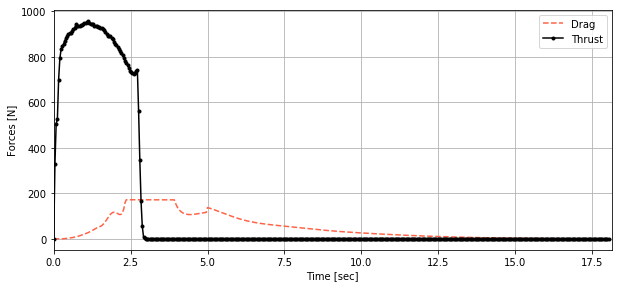

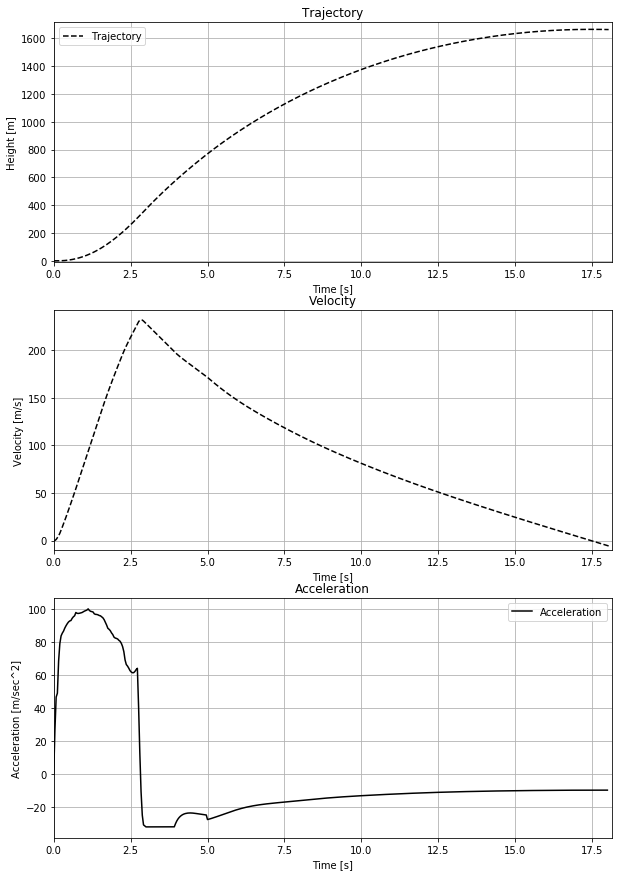

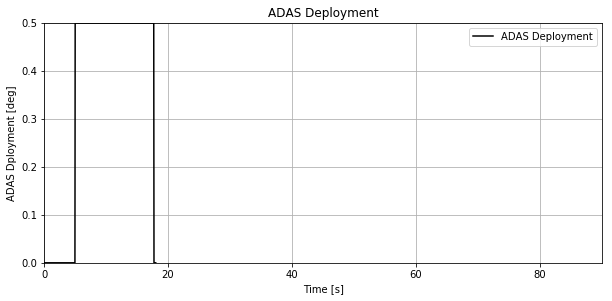

In [10]:
from matplotlib.pyplot import *
% matplotlib inline
import RocketSim as Sim


# following vals are for Aerotech K780
# (check: total thrust = 2361)

rocket_mass = 6.024 # 5.127
wet_motor = 2.934 # [kg]
propellant_mass = 1.267 # [kg]
dry_motor = wet_motor - propellant_mass
total_mass = rocket_mass + wet_motor
print ('Total mass: ' + str(total_mass) + 'kg')

thrust_profile = 'ThrustData/K780_thrust.txt'
burn_time = 2.92 # from K780 thrustcurve page
t_apogee = 17.7   # approximately
freq = 25.      # [Hz]
t_start = 1     # time to deploy

plots = True    # want to plot data? (True=yes)
logfile = 'SimData.csv'

# 2% attenuation for TMH - can we do better for full scale?
Sim.num_solver(thrust_profile, rocket_mass, dry_motor, propellant_mass, freq, burn_time, t_apogee, t_start, plots, logfile)

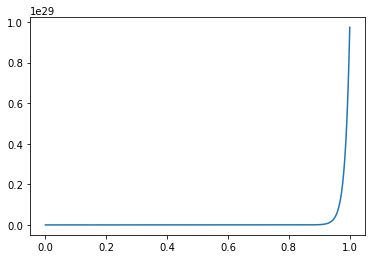

0.0090105315900401804

In [13]:
from OptimizeDeployment import OptimizeDeployment

h = 569.45594347
v = 198.68268742
OptimizeDeployment(h, v, total_mass)

In [ ]:
def Get_Drag_Function () :

    # Drag coefficient data from flow simulations with states P = 98000 [Pa], T = 283 [K], density = rho = 1.15 [kg/m^2]
    # NOTE: data excludes that for 10 degrees
    sim_drag_coeffs = [       # DUNCAN ROCKS   :D
    [0, 0.4897130673,    0.4605084415,    0.4566277895,    0.457260162,     0.4577140061,    0.4570957994,    0.4566626055,    0.5642732454,    0.4545761375,    0.5717283138],
    [0, 0.5697580479,    0.4602782598,    0.456513712,     0.4567162609,    0.4569759963,    0.456424171,     0.455415689,     0.5583588651,    0.5620175824,    0.5649677736],
    [0, 0.5668725374,    0.4682819154,    0.4469762488,    0.4645024797,    0.4644837072,    0.4639810209,    0.4625354359,    0.556496065,     0.559965656,     0.562991906],
    [0, 0.5638586086,    0.4830633638,    0.4804639344,    0.481315034,     0.4815977549,    0.4822440287,    0.4804765347,    0.5557061413,    0.5589313185,    0.5619646087],
    [0, 0.5641773622,    0.4839314615,    0.4825487796,    0.4821114534,    0.4831116457,    0.4827254992,    0.4811014429,    0.5541560884,    0.5575369803,    0.5604568335],
    [0, 0.5690075644,    0.4846769576,    0.4816589436,    0.4822390455,    0.4827377599,    0.4830244712,    0.4806339902,    0.5587568886,    0.5619985844,    0.5647384353],
    [0, 0.5702164927,    0.4923129991,    0.4892673582,    0.4893980557,    0.4892061981,    0.4885889214,    0.4869239868,    0.5621926732,    0.5655911728,    0.5683652118],
    [0, 0.57425205,      0.5092990664,    0.5063569557,    0.5065504403,    0.5063751519,    0.5060755784,    0.5064538141,    0.5662279936,    0.5694119308,    0.5721914277],
    [0, 0.5792708916,    0.5054756846,    0.50307373,      0.5033542067,    0.5032704218,    0.5022323,       0.5047265086,    0.5713875199,    0.5744315084,    0.5768540181],
    [0, 0.5788864078,    0.5192401696,    0.5165947143,    0.5170544599,    0.5171723766,    0.5165778943,    0.5151439218,    0.5719901683,    0.5750984082,    0.5780046877]] 
    sim_drag_coeffs = array(sim_drag_coeffs, dtype='float64')

    sim_velocities = array([0, 20, 40,  60,  80,  100, 120, 140, 160, 180, 200])  # [m/s] simulation velocities
    # ADAS_deploy_array = array([0, 14.4, 21.6, 28.8, 36, 43.2, 50.4, 57.6, 64.8, 72])     # degrees of deployment for sim data
    sim_deploy_percents = delete(linspace(0, 1, 11), 1)       # simlation deployment percentages
    
    
    # Cross-sectional area [m^2] with fin deployment corresponding to angles in ADAS_deploy_array 
    sim_deploy_areas = [0.007127518874, 0.007256550874, 0.007411389274, 0.007566227674, 0.007695259674, 0.007811388474, 0.007914614074, 0.008017839674, 0.008095258874, 0.008185581274]
    # Convert areas from subscale to full scale (only thing that should change in this calc)
    sim_deploy_areas = [x * 5.5/3.15 for x in sim_deploy_areas]    # convert to full scale
    
    # Drag force = .5 * rho * A * v^2 * cd [N = kg*m/s^2]
    drag_force = 0.5 * 1.15 * transpose( transpose(sim_drag_coeffs * sim_velocities**2) * sim_deploy_areas )

    return interp2d(sim_velocities, sim_deploy_percents, drag_force, kind='cubic') # or cubic -> what is O(A(%))?


